Exploration of linear regression

In [ ]:
# This will work with any csv in the same directory as the notebook.
# Some examples are below. Uncomment the line below to creat your own variable!

# file_name = '[your_stock_here]'

snp = 'gspc.csv'
aapl = 'AAPL.csv'

In [3]:
# import required modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [4]:
def convert_dates(date_list):
    """
    Takes iterable of date strings (eg:'1900-1-1') as a parameter and returns a pd.Series
    of datetime objects 
    """

    # split date strings in to year, month, day. date_array becomes a 2d array where
    # first axis is dates, and second axis is year, month, and day
    date_array = []    
    for date in date_list:
        date_array.append(date.split('-'))
    
    # convert date strings into ints
    clean_dates = []
    for date in date_array:
        clean_dates.append([int(d) for d in date])
        
    # convert int lists to datetime objects
    datetimes = []
    for date in clean_dates:
        t = datetime(date[0], date[1], date[2])
        datetimes.append(time.mktime(t.timetuple()))
        
    return datetimes

In [7]:
def stock_regression(file_name):
    df = pd.read_csv(file_name)
    raw_dates = pd.Series(df['Date'][1:])

    X = np.array(convert_dates(raw_dates))
    y = np.array(df['Close'][1:])

    # reshape y because sklearn needs 2d array
    X = X.reshape(-1, 1)
    
    # split training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
    
    # create model and predictions
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # plot 'em
    plt.plot(X,y)
    plt.plot(X_test, y_pred)
    
    # print accuracy
    print(f"Training set score: {model.score(X_train, y_train)}")
    print(f"Test set score: {model.score(X_test, y_test)}")

Training set score: 0.7523937382385173
Test set score: 0.7586179342916427


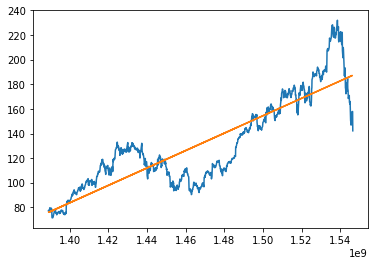

In [8]:
stock_regression(aapl)